In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("Set2", n_colors=20, desat=.6)

In [3]:
airbnb = pd.read_csv("airbnb-with-distances.csv")

In [4]:
airbnb["price"].isnull().value_counts()

False    19368
True         9
Name: price, dtype: int64

In [5]:
airbnb = airbnb[airbnb["price"].isnull() == False]
airbnb = airbnb.drop(["room_id", "host_id", "borough", "latitude", "longitude", "last_modified"], axis=1)
airbnb.loc[airbnb["minstay"].isnull() == True, "minstay"] = 1
airbnb = airbnb.dropna()

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 0 to 19376
Data columns (total 11 columns):
room_type               12157 non-null object
neighborhood            12157 non-null object
reviews                 12157 non-null int64
overall_satisfaction    12157 non-null float64
accommodates            12157 non-null int64
bedrooms                12157 non-null float64
price                   12157 non-null float64
minstay                 12157 non-null float64
train_dist              12157 non-null float64
bus_dist                12157 non-null float64
road_dist               12157 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.1+ MB


In [7]:
airbnb.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,train_dist,bus_dist,road_dist
0,Private room,TS29,13,4.5,1,1.0,39.0,5.0,0.011387,0.000671,0.000005
2,Entire home/apt,TS20,4,5.0,2,1.0,76.0,2.0,0.006174,0.002294,0.000765
3,Private room,TS15,7,5.0,1,1.0,45.0,7.0,0.003616,0.000573,0.000354
4,Private room,MK18,14,5.0,2,1.0,58.0,4.0,0.008916,0.003126,0.003503
6,Private room,TS17,4,3.5,6,1.0,103.0,1.0,0.004462,0.001469,0.000959


#  

In [8]:
airbnb["price"].describe()

count    12157.000000
mean       104.893724
std        123.372714
min         10.000000
25%         48.000000
50%         80.000000
75%        134.000000
max       7957.000000
Name: price, dtype: float64

Skewness: 26.059082
Kurtosis: 1433.335820


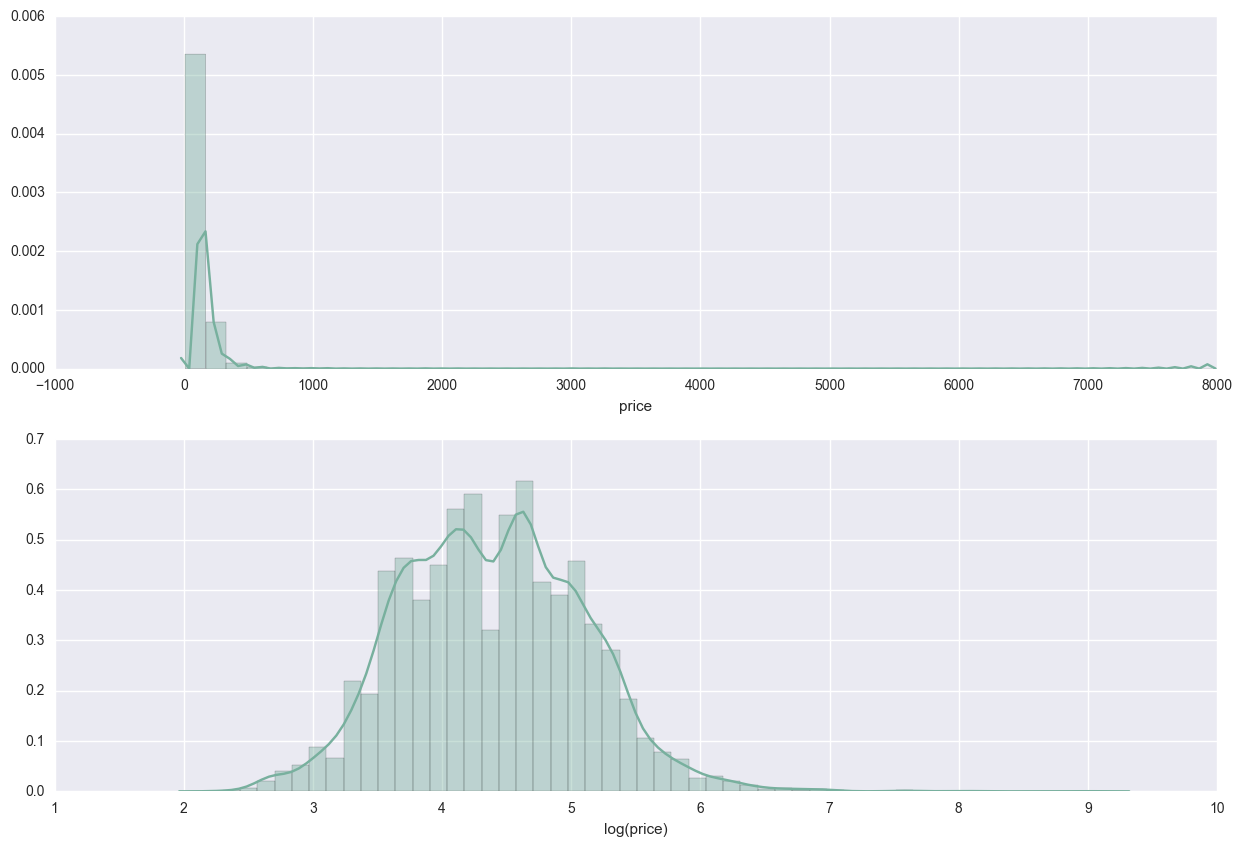

In [9]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15, 10)
print("Skewness: %f" % airbnb["price"].skew())
print("Kurtosis: %f" % airbnb["price"].kurt())
sns.distplot(airbnb["price"], ax=ax[0])
sns.distplot(airbnb["price"].apply(np.log), ax=ax[1])
ax[1].set_xlabel("log(price)")

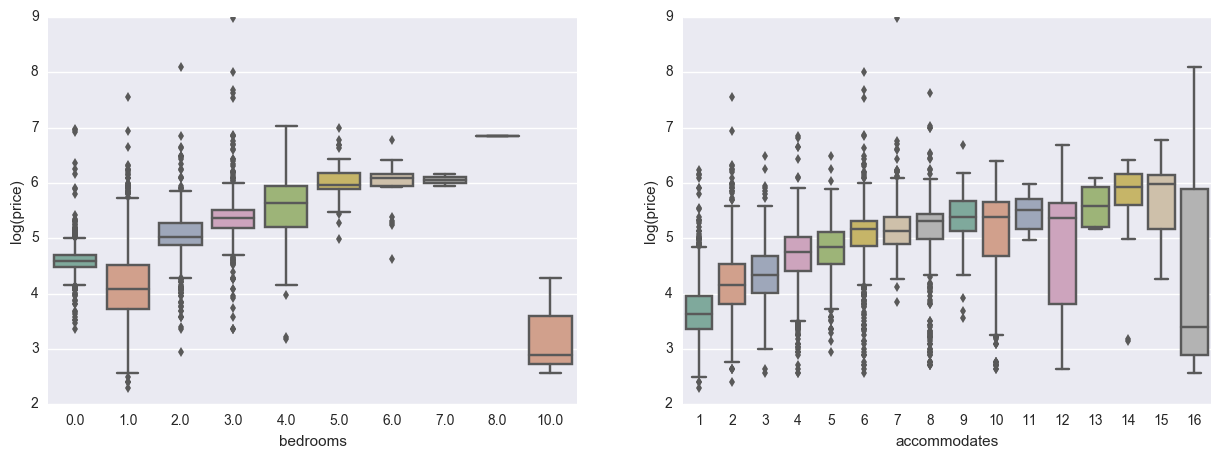

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
sns.boxplot(x="bedrooms", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.boxplot(x="accommodates", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])
ax[0].set_ylabel("log(price)")
ax[1].set_ylabel("log(price)")

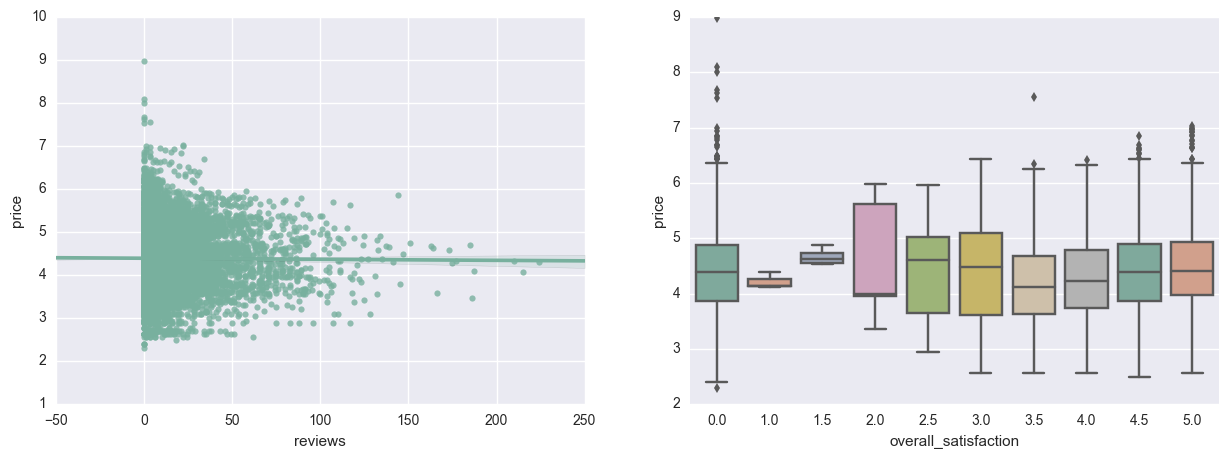

In [11]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
sns.regplot(x="reviews", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.boxplot(x="overall_satisfaction", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])

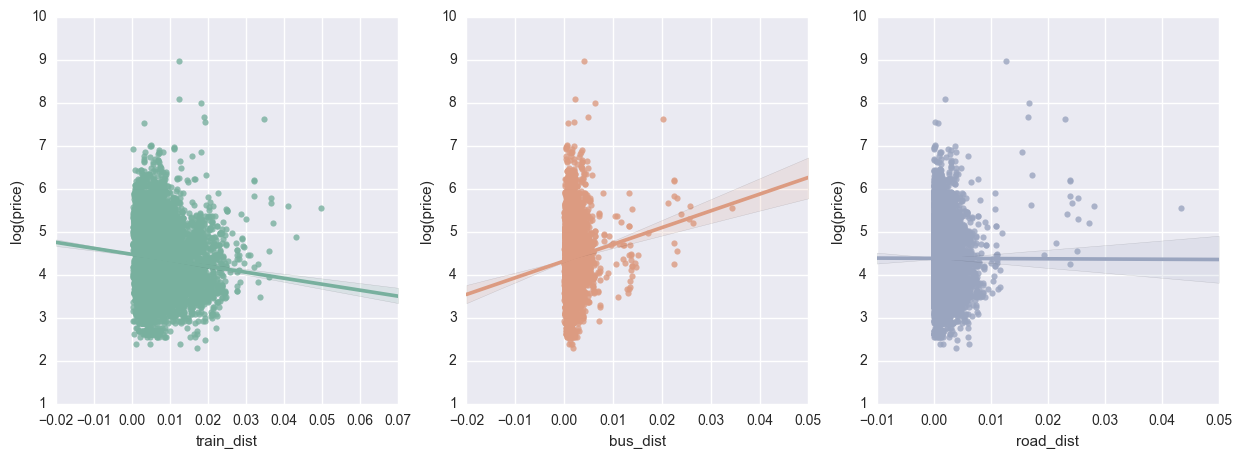

In [12]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
sns.regplot(x="train_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[0])
sns.regplot(x="bus_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[1])
sns.regplot(x="road_dist", y=airbnb["price"].apply(np.log), data=airbnb, ax=ax[2])
ax[0].set_ylabel("log(price)")
ax[1].set_ylabel("log(price)")
ax[2].set_ylabel("log(price)")

#  

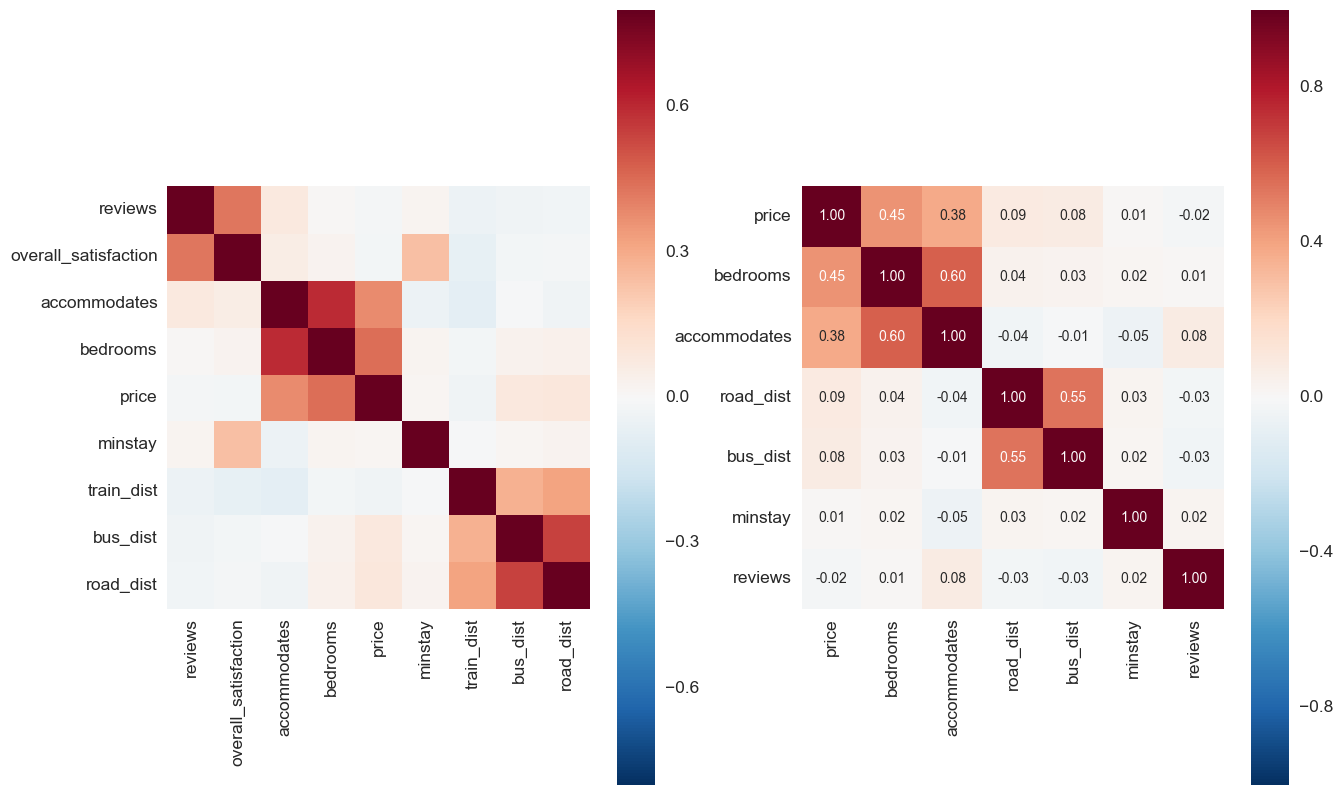

In [13]:
corr = airbnb.corr()
corr_mat = airbnb.corr()
k = 7
cols = corr_mat.nlargest(k, "price")["price"].index
cm = np.corrcoef(airbnb[cols].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 10)
sns.heatmap(corr, vmax=.8, square=True, ax=ax[0], )
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, ax=ax[1])

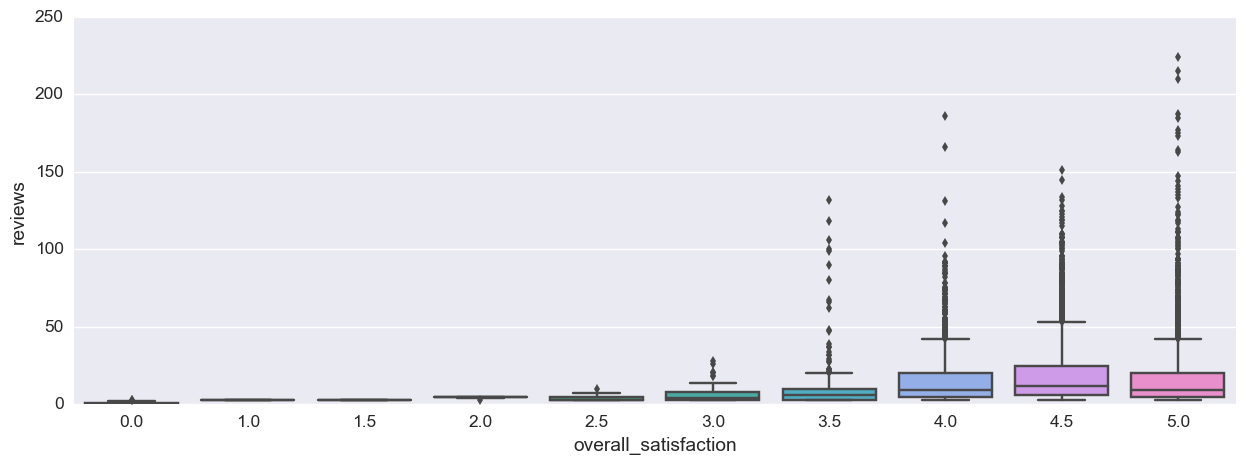

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(x="overall_satisfaction", y="reviews", data=airbnb)

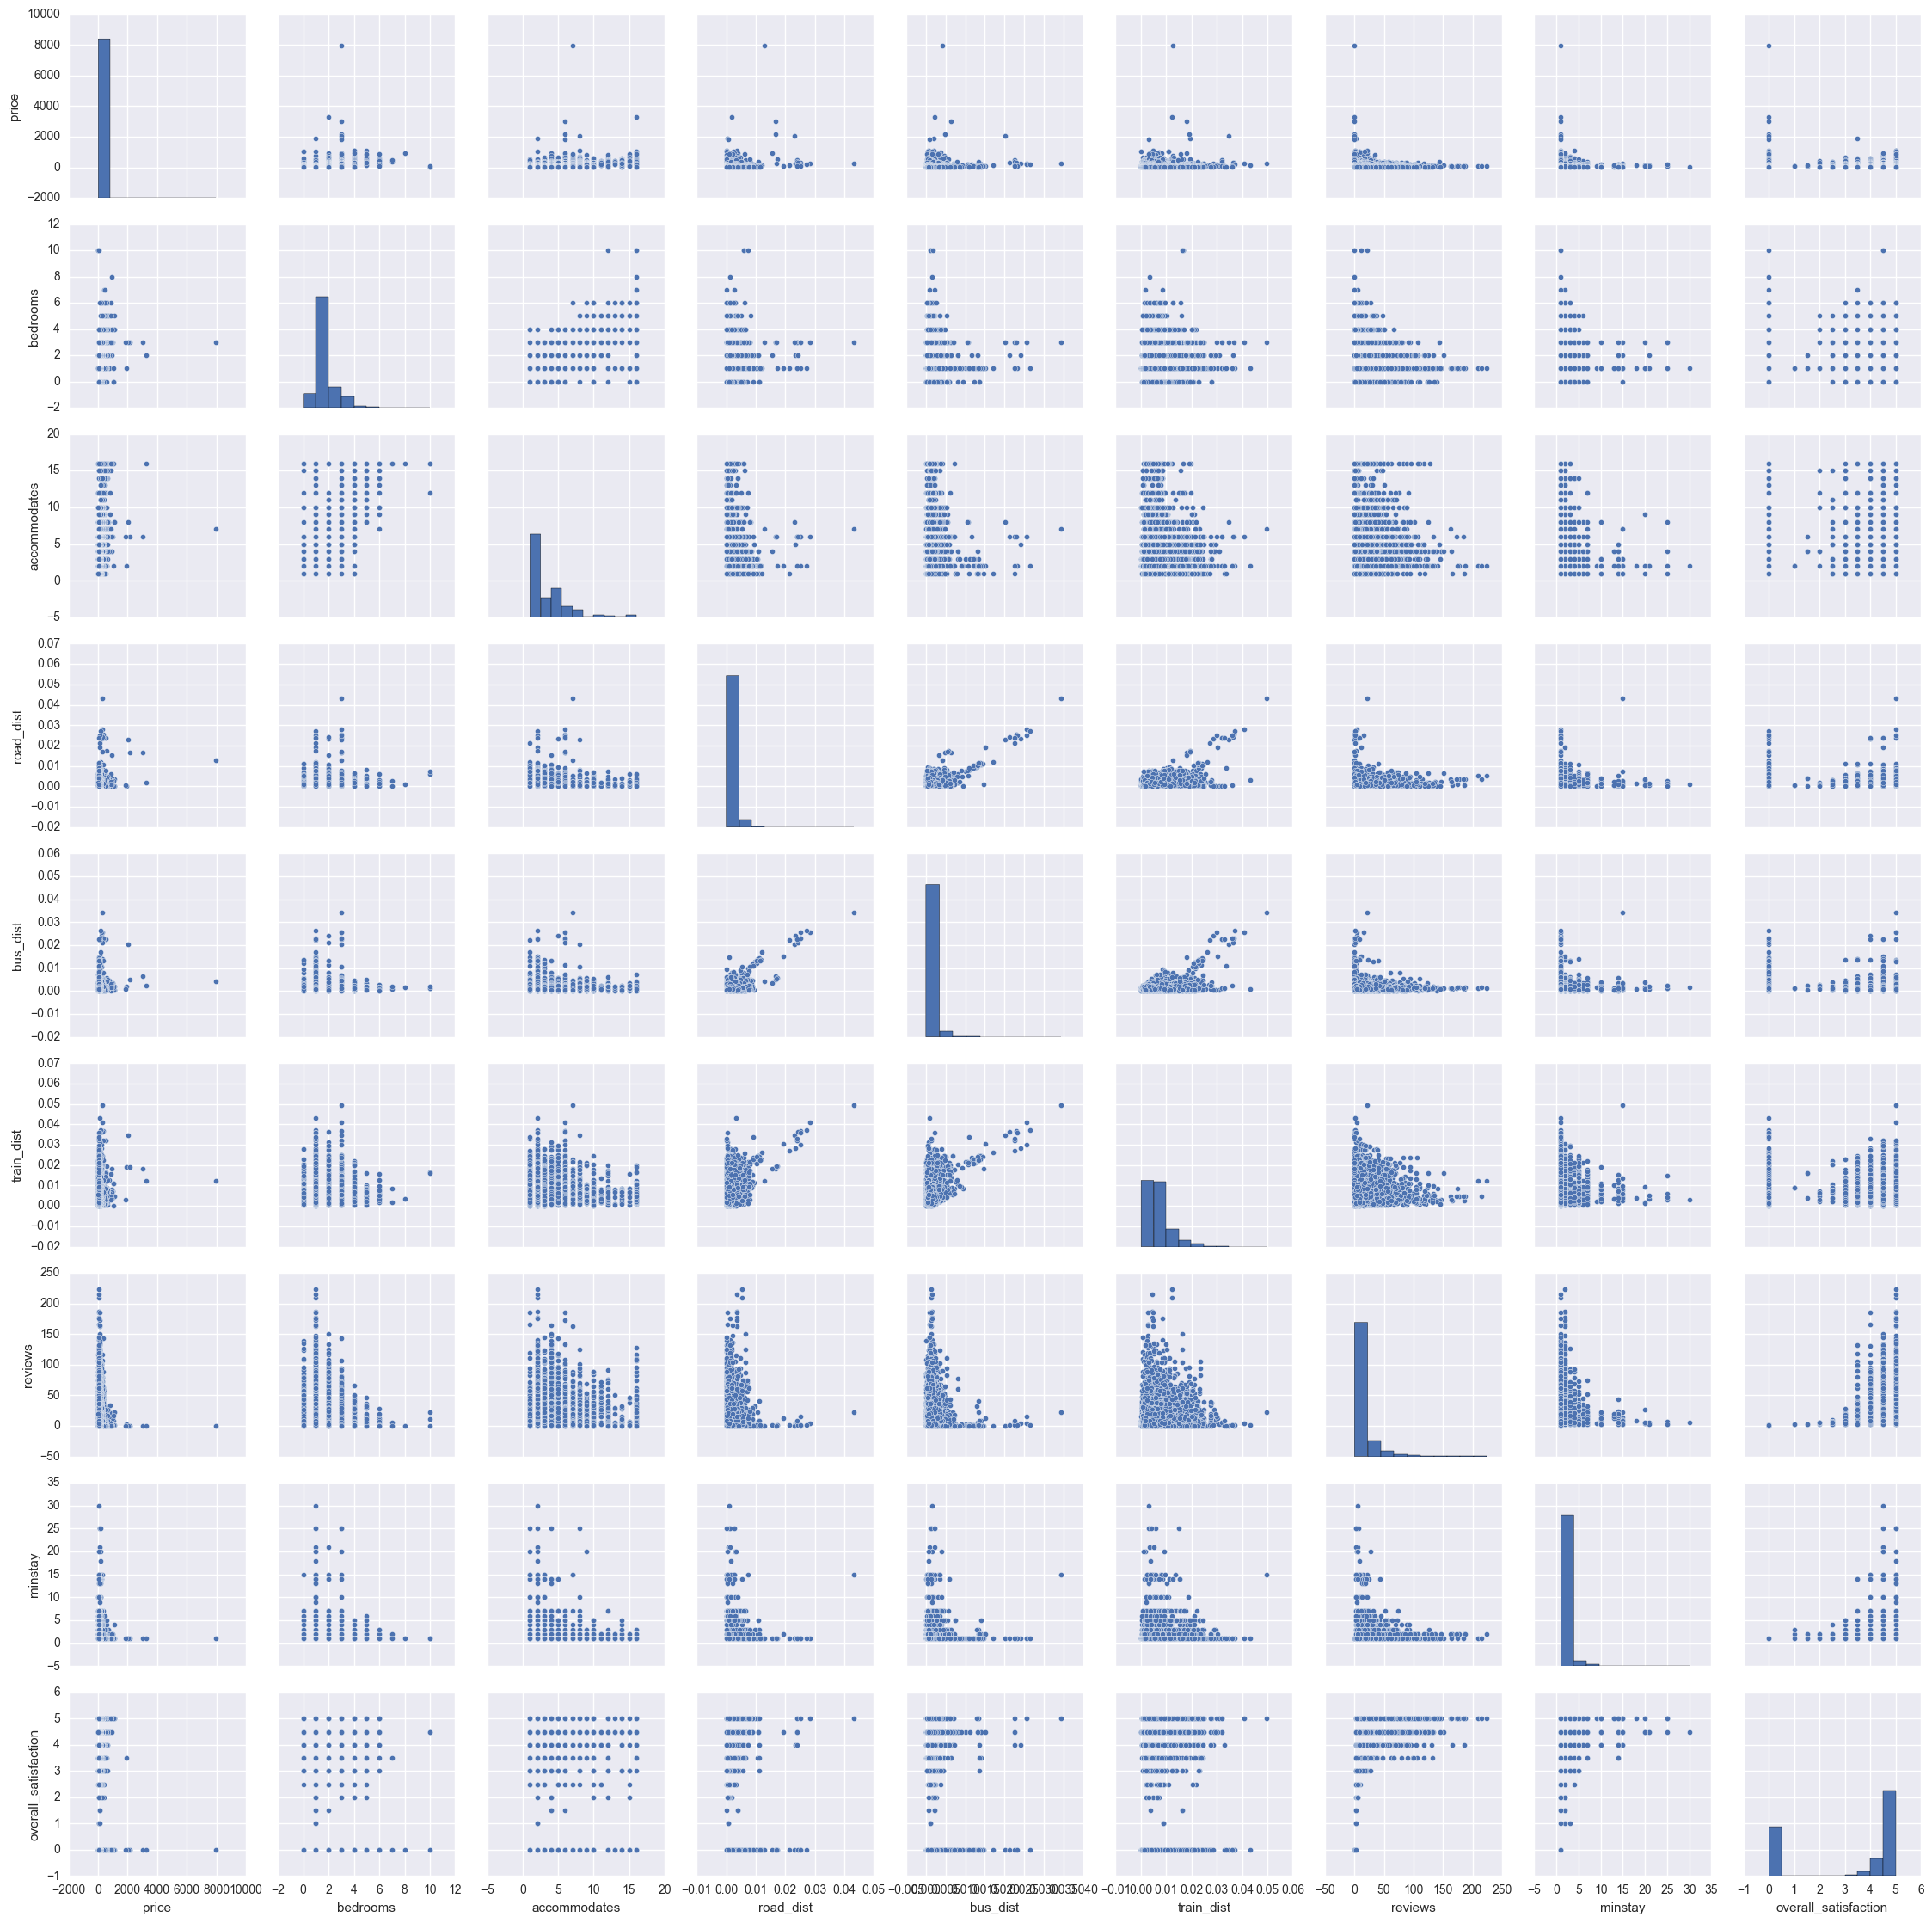

In [15]:
sns.set()
col = ['price', 'bedrooms', 'accommodates', 'road_dist', 'bus_dist',
       'train_dist', 'reviews', 'minstay', 'overall_satisfaction']
sns.pairplot(airbnb[col])

#  

In [16]:
pd.concat([airbnb.isnull().sum().sort_values(ascending=False), (airbnb.isnull().sum()/airbnb.isnull().count()).sort_values(ascending=False)], 
          axis=1, keys=["Total", "Percentage"])

,Total,Percentage
road_dist,0,0.0
bus_dist,0,0.0
train_dist,0,0.0
minstay,0,0.0
price,0,0.0
bedrooms,0,0.0
accommodates,0,0.0
overall_satisfaction,0,0.0
reviews,0,0.0
neighborhood,0,0.0


#  

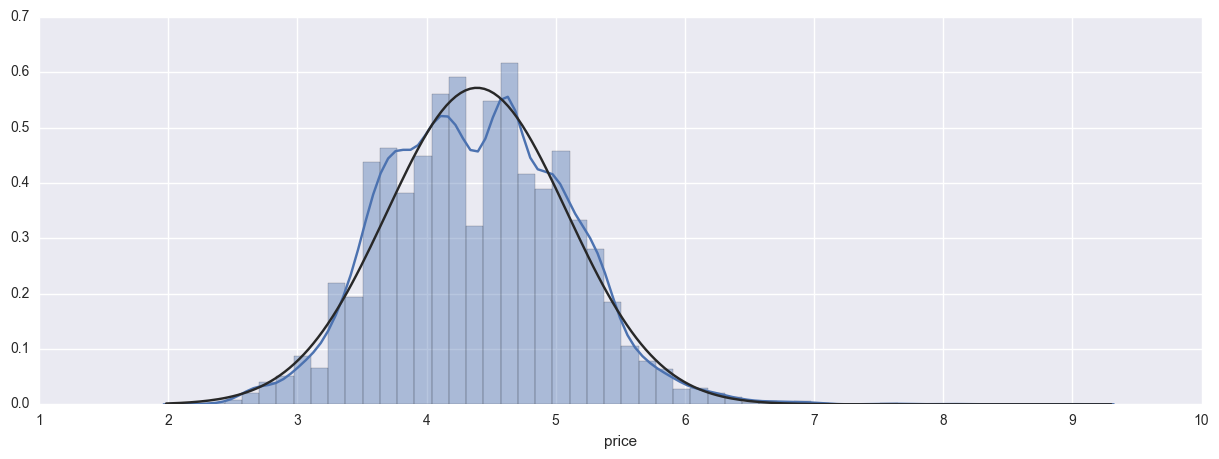

In [17]:
from scipy.stats import norm
airbnb["price"] = airbnb["price"].apply(np.log)
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.distplot(airbnb["price"], fit=norm)

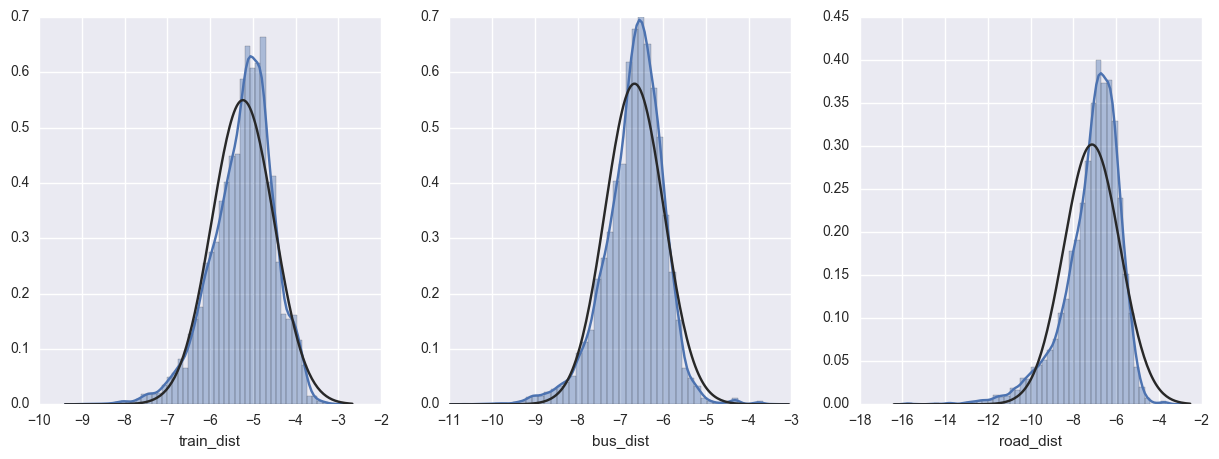

In [18]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
sns.distplot(airbnb["train_dist"].apply(np.log), fit=norm, ax=ax[0])
sns.distplot(airbnb["bus_dist"].apply(np.log), fit=norm, ax=ax[1])
sns.distplot(airbnb["road_dist"].apply(np.log), fit=norm, ax=ax[2])

In [19]:
airbnb["train_dist"] = airbnb["train_dist"].apply(np.log)
airbnb["road_dist"] = airbnb["road_dist"].apply(np.log)
airbnb["bus_dist"] = airbnb["bus_dist"].apply(np.log)

In [20]:
airbnb.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,train_dist,bus_dist,road_dist
0,Private room,TS29,13,4.5,1,1.0,3.663562,5.0,-4.475283,-7.306198,-12.131445
2,Entire home/apt,TS20,4,5.0,2,1.0,4.330733,2.0,-5.087392,-6.077253,-7.175243
3,Private room,TS15,7,5.0,1,1.0,3.806662,7.0,-5.622387,-7.464947,-7.946521
4,Private room,MK18,14,5.0,2,1.0,4.060443,4.0,-4.719908,-5.768144,-5.654223
6,Private room,TS17,4,3.5,6,1.0,4.634729,1.0,-5.412225,-6.523454,-6.949908


#  

In [21]:
airbnb_X = airbnb.drop(["bedrooms"], axis=1)
airbnb_y = airbnb["price"]

In [22]:
airbnb_X.loc[(airbnb_X.price <= airbnb_X.groupby("neighborhood").mean()["price"].describe()["25%"]), "neighborhood_price"] = "Low Price Area"
airbnb_X.loc[(airbnb_X.price > airbnb_X.groupby("neighborhood").mean()["price"].describe()["75%"]), "neighborhood_price"] = "High Price Area"
airbnb_X.loc[(airbnb_X.price > airbnb_X.groupby("neighborhood").mean()["price"].describe()["25%"]) & (airbnb_X.price <= airbnb_X.groupby("neighborhood").mean()["price"].describe()["75%"]), "neighborhood_price"] = "Medium Price Area"
airbnb_X = airbnb_X.drop("neighborhood", axis=1)

In [23]:
airbnb_X["general_sentiment"] = airbnb["overall_satisfaction"] * airbnb["reviews"]
airbnb_X = airbnb_X.drop(["overall_satisfaction", "reviews"], axis=1)

In [24]:
# airbnb_X["transportation_convenience"] = -(0.38 * airbnb_X["train_dist"] + 0.33 * airbnb_X["bus_dist"] + 0.29 * airbnb_X["road_dist"])
# airbnb_X = airbnb_X.drop(["train_dist", "bus_dist", "road_dist"], axis=1)

In [25]:
airbnb_X.head()

,room_type,accommodates,price,minstay,train_dist,bus_dist,road_dist,neighborhood_price,general_sentiment
0,Private room,1,3.663562,5.0,-4.475283,-7.306198,-12.131445,Low Price Area,58.5
2,Entire home/apt,2,4.330733,2.0,-5.087392,-6.077253,-7.175243,Medium Price Area,20.0
3,Private room,1,3.806662,7.0,-5.622387,-7.464947,-7.946521,Low Price Area,35.0
4,Private room,2,4.060443,4.0,-4.719908,-5.768144,-5.654223,Low Price Area,70.0
6,Private room,6,4.634729,1.0,-5.412225,-6.523454,-6.949908,High Price Area,14.0


#  

In [26]:
airbnb_X = airbnb_X.join(pd.get_dummies(airbnb_X["room_type"]).iloc[:, :2].join(pd.get_dummies(airbnb_X["neighborhood_price"]).iloc[:, :2]))
airbnb_X = airbnb_X.drop(["room_type", "neighborhood_price"], axis=1)

In [27]:
airbnb_X = airbnb_X.drop("price", axis=1)

In [28]:
airbnb_X.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,general_sentiment,Entire home/apt,Private room,High Price Area,Low Price Area
0,1,5.0,-4.475283,-7.306198,-12.131445,58.5,0.0,1.0,0.0,1.0
2,2,2.0,-5.087392,-6.077253,-7.175243,20.0,1.0,0.0,0.0,0.0
3,1,7.0,-5.622387,-7.464947,-7.946521,35.0,0.0,1.0,0.0,1.0
4,2,4.0,-4.719908,-5.768144,-5.654223,70.0,0.0,1.0,0.0,1.0
6,6,1.0,-5.412225,-6.523454,-6.949908,14.0,0.0,1.0,1.0,0.0


#  

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(airbnb_X, airbnb_y, test_size=0.33)
print(X_train.shape)
print(X_test.shape)

(8145, 10)
(4012, 10)


In [30]:
model = xgb.XGBRegressor(learning_rate=0.36).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
xgb_model = xgb.XGBRegressor(learning_rate=0.36)
scores = cross_val_score(xgb_model, airbnb_X, airbnb_y, cv=20, scoring='neg_mean_squared_error', n_jobs=3)
print("RMSE: %0.5f" % np.sqrt(-scores.mean()))

RMSE: 0.27117


In [32]:
pd.Series(model.feature_importances_, index=airbnb_X.columns).sort_values(ascending=False)

train_dist           0.267964
bus_dist             0.205090
road_dist            0.190120
accommodates         0.155689
general_sentiment    0.065868
Low Price Area       0.034431
minstay              0.025449
High Price Area      0.020958
Entire home/apt      0.017964
Private room         0.016467
dtype: float32

In [33]:
pd.concat([pd.Series(model.predict(X_test), index=X_test.index), y_test], axis=1, keys=["pred_price", "actual_price"]).apply(lambda x: np.e**x).head(20)

,pred_price,actual_price
7353,21.194084,24.0
7137,80.978134,98.0
15134,150.148621,123.0
13608,183.165726,218.0
8795,182.085297,132.0
10946,39.754498,45.0
16659,71.962715,69.0
4455,43.207783,37.0
9549,147.546494,165.0
15711,84.930145,76.0


#  

In [34]:
airbnb_new = airbnb_X.join(airbnb_y)
airbnb_new.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,general_sentiment,Entire home/apt,Private room,High Price Area,Low Price Area,price
0,1,5.0,-4.475283,-7.306198,-12.131445,58.5,0.0,1.0,0.0,1.0,3.663562
2,2,2.0,-5.087392,-6.077253,-7.175243,20.0,1.0,0.0,0.0,0.0,4.330733
3,1,7.0,-5.622387,-7.464947,-7.946521,35.0,0.0,1.0,0.0,1.0,3.806662
4,2,4.0,-4.719908,-5.768144,-5.654223,70.0,0.0,1.0,0.0,1.0,4.060443
6,6,1.0,-5.412225,-6.523454,-6.949908,14.0,0.0,1.0,1.0,0.0,4.634729


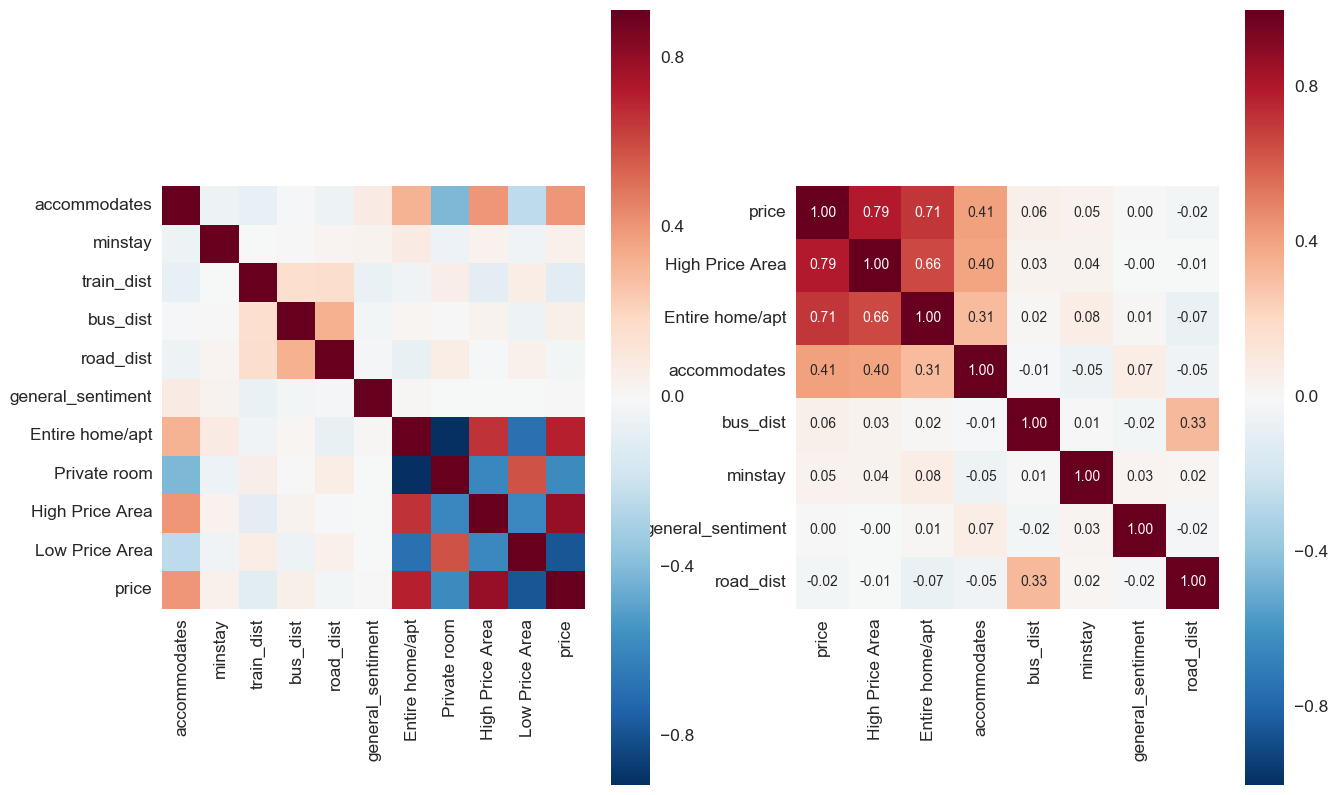

In [35]:
corr_new = airbnb_new.corr()
corr_mat_new = airbnb_new.corr()
k = 8
cols_new = corr_mat_new.nlargest(k, "price")["price"].index
cm_new = np.corrcoef(airbnb_new[cols_new].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 10)
sns.heatmap(corr_new, vmax=.8, square=True, ax=ax[0])
sns.heatmap(cm_new, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols_new.values, xticklabels=cols_new.values, ax=ax[1])

In [36]:
import statsmodels.api as sm
new_model = sm.OLS(airbnb_y, airbnb_X)
results = new_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.546e+05
Date:                Tue, 11 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:56:18   Log-Likelihood:                -5878.3
No. Observations:               12157   AIC:                         1.178e+04
Df Residuals:                   12147   BIC:                         1.185e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
accommodates          0.0653      0.00

#  

In [37]:
def log_if_not_zero(x):
    if(x == 0): return x
    else: return np.log(x)

In [38]:
airbnb_X_new = airbnb_X.copy()
airbnb_X_new["general_sentiment"] = airbnb_X_new["general_sentiment"].apply(log_if_not_zero)

In [39]:
general_sentiment = airbnb_X_new.loc[airbnb_X_new["general_sentiment"] != 0, "general_sentiment"].describe()

In [40]:
airbnb_X_new.loc[airbnb_X_new["general_sentiment"] == 0, "has_sentiment"] = 1
airbnb_X_new.loc[airbnb_X_new["general_sentiment"] != 0, "has_sentiment"] = 0
airbnb_X_new.drop("general_sentiment", axis=1, inplace=True)

In [41]:
airbnb_X_new.head()

,accommodates,minstay,train_dist,bus_dist,road_dist,Entire home/apt,Private room,High Price Area,Low Price Area,has_sentiment
0,1,5.0,-4.475283,-7.306198,-12.131445,0.0,1.0,0.0,1.0,0.0
2,2,2.0,-5.087392,-6.077253,-7.175243,1.0,0.0,0.0,0.0,0.0
3,1,7.0,-5.622387,-7.464947,-7.946521,0.0,1.0,0.0,1.0,0.0
4,2,4.0,-4.719908,-5.768144,-5.654223,0.0,1.0,0.0,1.0,0.0
6,6,1.0,-5.412225,-6.523454,-6.949908,0.0,1.0,1.0,0.0,0.0


In [42]:
scores = cross_val_score(xgb_model, airbnb_X_new, airbnb_y, cv=20, scoring='neg_mean_squared_error', n_jobs=3)
print("RMSE: %0.5f" % np.sqrt(-scores.mean()))

RMSE: 0.27083


#  

In [43]:
airbnb_final = airbnb_X_new.join(airbnb_y)
airbnb_final.columns = ['accommodates', 'minstay', 'log(train_dist)', 'log(bus_dist)', 'log(road_dist)', 'Entire home/apt', 'Private room', 'High Price Area', 'Low Price Area', 'has_sentiment', 'log(price)']
airbnb_final_X = airbnb_final.drop('log(price)', axis=1)
airbnb_final_y = airbnb_final['log(price)']

In [44]:
airbnb_final.head()

,accommodates,minstay,log(train_dist),log(bus_dist),log(road_dist),Entire home/apt,Private room,High Price Area,Low Price Area,has_sentiment,log(price)
0,1,5.0,-4.475283,-7.306198,-12.131445,0.0,1.0,0.0,1.0,0.0,3.663562
2,2,2.0,-5.087392,-6.077253,-7.175243,1.0,0.0,0.0,0.0,0.0,4.330733
3,1,7.0,-5.622387,-7.464947,-7.946521,0.0,1.0,0.0,1.0,0.0,3.806662
4,2,4.0,-4.719908,-5.768144,-5.654223,0.0,1.0,0.0,1.0,0.0,4.060443
6,6,1.0,-5.412225,-6.523454,-6.949908,0.0,1.0,1.0,0.0,0.0,4.634729


In [45]:
new_model = sm.OLS(airbnb_final_y, airbnb_final_X)
results = new_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.583e+05
Date:                Tue, 11 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:56:23   Log-Likelihood:                -5738.6
No. Observations:               12157   AIC:                         1.150e+04
Df Residuals:                   12147   BIC:                         1.157e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
accommodates        0.0668      0.001     

In [46]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_final_X, airbnb_final_y, test_size=0.33)
model = xgb.XGBRegressor(learning_rate=0.36).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
print("RMSE: %0.5f" % np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE: 0.24741


In [48]:
pd.concat([pd.Series(model.predict(X_test), index=X_test.index), y_test], axis=1, keys=["pred_price", "actual_price"]).apply(lambda x: np.e**x).head(20)

,pred_price,actual_price
9873,43.608330,53.0
7081,342.661377,389.0
3492,42.856453,60.0
3394,41.098301,57.0
16617,129.073990,109.0
13069,24.328074,19.0
6948,47.643856,50.0
15449,84.634254,89.0
11634,43.570530,26.0
13302,179.613052,291.0


#  